# CREDIT CARD FRAUD DETECTION 

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.The given dataset contains only numerical input variables which are the result of a PCA transformation.Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# DATA PREPROCESSING

In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.combine import SMOTETomek
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#READ THE DATASET
data = pd.read_csv('creditcard.csv')

In [3]:
#GIVES STARTING FIRST 5 ROWS
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
#GIVES LAST 5 ROWS
data.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

In [5]:
#SHAPE OF THE DATASET (ROW,COLUMN)
data.shape 

(284807, 31)

In [6]:
#INFORMATION ABOUT THE DATA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#CHECK THE NULL VALUE( TRUE->NULL VALUE PRESENT : FALSE-> NOT PRESENT)
data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [8]:
#GIVES THE COUNT OF NULL VALUES
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [10]:
#NAME OF THE COLUMNS 
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
print('Number of frauds : ', data['Class'].value_counts()[1])
print('Number of no frauds : ', data['Class'].value_counts()[0])

Number of frauds :  492
Number of no frauds :  284315


In [12]:
#GIVES RANDOM 7 ROWS
data.sample(7)

Time        V1        V2        V3        V4        V5        V6  \
54296    46380.0 -3.298211  3.035610  0.338640 -1.091235  0.064791 -0.607698   
145383   86897.0  2.225878 -1.626100  0.086886 -1.423590 -2.025816 -0.401147   
158804  111778.0 -0.019511  0.405771 -0.833921  0.065215  2.315600  1.142958   
31687    36470.0  0.876717 -0.794528  0.758369  0.108773 -1.286176 -0.731389   
46913    42986.0 -0.303467  0.854720  1.319803  1.235954 -0.920612 -0.161589   
142840   84968.0  1.221839 -0.275754 -0.302447  0.158792  1.550790  4.055904   
174724  122039.0  1.508562 -0.705198 -2.048062  0.754457 -0.103236 -1.389603   

              V7        V8        V9  ...       V21       V22       V23  \
54296   1.345043 -0.727077  3.294900  ... -0.982813 -1.009455 -0.048977   
145383 -1.777886 -0.020114 -0.583791  ... -0.146697  0.142268  0.320452   
158804  0.763329  0.411152 -0.514039  ...  0.265012  0.855883 -0.042654   
31687  -0.289021 -0.096909  0.645038  ...  0.089439 -0.172794 -0.083199   
46913  -0.433443  0.498104  0.364972  ...  0.176579  0.608883  0.198589   
142840 -1.150930  1.092834  0.762226  ... -0.120045 -0.275308 -0.033778   
174724  0.648651 -0.463006  0.571619  ...  0.364228  0.573668 -0.279548   

             V24       V25       V26       V27       V28  Amount  Class  
54296  -0.166210  0.432049  0.008573  0.952234 -0.013775   10.78      0  
145383 -0.133169 -0.522864 -0.240060  0.066897 -0.029225   22.00      0  
158804 -0.752117 -0.283569 -0.552864  0.108819  0.030011    5.49      0  
31687   0.456353 -0.043730  0.939238 -0.087310  0.050768  200.00      0  
46913   0.398895 -1.187551 -0.557035  0.026935  0.120925    9.99      0  
142840  1.000671  0.576495 -0.392797  0.076090  0.030238    2.36      0  
174724 -0.075089  0.154158 -0.129951 -0.056956  0.017962  289.71      0  

[7 rows x 31 columns]

# CORRELATION MATRIX

On a dataset with many attributes, the set of correlation values between pairs of its attributes form a matrix which is called a correlation matrix.correlation is a measure of how strongly one variable depends on another.


Positive correlation is one variable is directly proportional to the other variable. Negative correlation is one variable is inversely proportional to the other variable.

In [13]:
#CORRELATION MATRIX
corr = data.corr()
corr

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.697350e-17 -1.424390e-15  1.755316e-17   
V2     -0.010593  4.697350e-17  1.000000e+00  2.512175e-16 -1.126388e-16   
V3     -0.419618 -1.424390e-15  2.512175e-16  1.000000e+00 -3.416910e-16   
V4     -0.105260  1.755316e-17 -1.126388e-16 -3.416910e-16  1.000000e+00   
V5      0.173072  6.391162e-17 -2.039868e-16 -1.436514e-15 -1.940929e-15   
V6     -0.063016  2.398071e-16  5.024680e-16  1.431581e-15 -2.712659e-16   
V7      0.084714  1.991550e-15  3.966486e-16  2.168574e-15  1.556330e-16   
V8     -0.036949 -9.490675e-17 -4.413984e-17  3.433113e-16  5.195643e-16   
V9     -0.008660  2.169581e-16 -5.728718e-17 -4.233770e-16  3.859585e-16   
V10     0.030617  7.433820e-17 -4.782388e-16  6.289267e-16  6.055490e-16   
V11    -0.247689  2.438580e-16  9.468995e-16 -5.501758e-17 -2.083600e-16   
V12     0.124348  2.422086e-16 -6.588252e-16  2.206522e-16 -5.657963e-16   
V13    -0.065902 -2.115458e-16  3.854521e-16 -6.883375e-16 -1.506129e-16   
V14    -0.098757  9.352582e-16 -2.541036e-16  4.271336e-16 -8.522435e-17   
V15    -0.183453 -3.252451e-16  2.831060e-16  1.122756e-16 -1.507718e-16   
V16     0.011903  6.308789e-16  4.934097e-17  1.183364e-15 -6.939204e-16   
V17    -0.073297 -5.011524e-16 -9.883008e-16  4.576619e-17 -4.397925e-16   
V18     0.090438  2.870125e-16  2.636654e-16  5.427965e-16  1.493667e-16   
V19     0.028975  1.818128e-16  9.528280e-17  2.576773e-16 -2.656938e-16   
V20    -0.050866  1.036959e-16 -9.309954e-16 -9.429297e-16 -3.223123e-16   
V21     0.044736 -1.755072e-16  8.444409e-17 -2.971969e-17 -9.976950e-17   
V22     0.144059  7.477367e-17  2.500830e-16  4.648259e-16  2.099922e-16   
V23     0.051142  9.808705e-16  1.059562e-16  2.115206e-17  6.002528e-17   
V24    -0.016182  7.354269e-17 -8.142354e-18 -9.351637e-17  2.229738e-16   
V25    -0.233083 -9.805358e-16 -4.261894e-17  4.771164e-16  5.394585e-16   
V26    -0.041407 -8.621897e-17  2.601622e-16  6.521501e-16 -6.179751e-16   
V27    -0.005135  3.208233e-17 -4.478472e-16  6.239832e-16 -6.403423e-17   
V28    -0.009413  9.820892e-16 -3.676415e-16  7.726948e-16 -5.863664e-17   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      6.391162e-17  2.398071e-16  1.991550e-15 -9.490675e-17  2.169581e-16   
V2     -2.039868e-16  5.024680e-16  3.966486e-16 -4.413984e-17 -5.728718e-17   
V3     -1.436514e-15  1.431581e-15  2.168574e-15  3.433113e-16 -4.233770e-16   
V4     -1.940929e-15 -2.712659e-16  1.556330e-16  5.195643e-16  3.859585e-16   
V5      1.000000e+00  7.926364e-16 -4.209851e-16  7.589187e-16  4.205206e-16   
V6      7.926364e-16  1.000000e+00  1.429426e-16 -1.707421e-16  1.114447e-16   
V7     -4.209851e-16  1.429426e-16  1.000000e+00 -8.691834e-17  7.933251e-16   
V8      7.589187e-16 -1.707421e-16 -8.691834e-17  1.000000e+00  2.900829e-16   
V9      4.205206e-16  1.114447e-16  7.933251e-16  2.900829e-16  1.000000e+00   
V10    -6.601716e-16  2.850776e-16  3.043333e-17  9.051847e-17 -2.771761e-16   
V11     7.342759e-16  4.865799e-16 -1.084105e-15  1.954747e-16  4.682341e-16   
V12     3.761033e-16  2.140589e-16  1.510045e-15 -6.266057e-17 -2.445230e-15   
V13    -9.578659e-16 -2.268061e-16 -9.892325e-17 -2.382948e-16 -2.650351e-16   
V14    -3.634803e-16  3.452801e-16 -1.729462e-16 -1.131098e-16  2.343317e-16   
V15    -5.132620e-16 -6.368111e-18  1.936832e-17  2.021491e-16 -1.588105e-15   
V16    -3.517076e-16 -2.477917e-16  2.893672e-16  5.027192e-16 -3.251906e-16   
V17     1.425729e-16  3.567582e-16  1.149692e-15 -3.508777e-16  6.535992e-16   
V18     1.109525e-15  2.811474e-16 -1.116789e-16 -4.093852e

# DATA VISUALIZATION

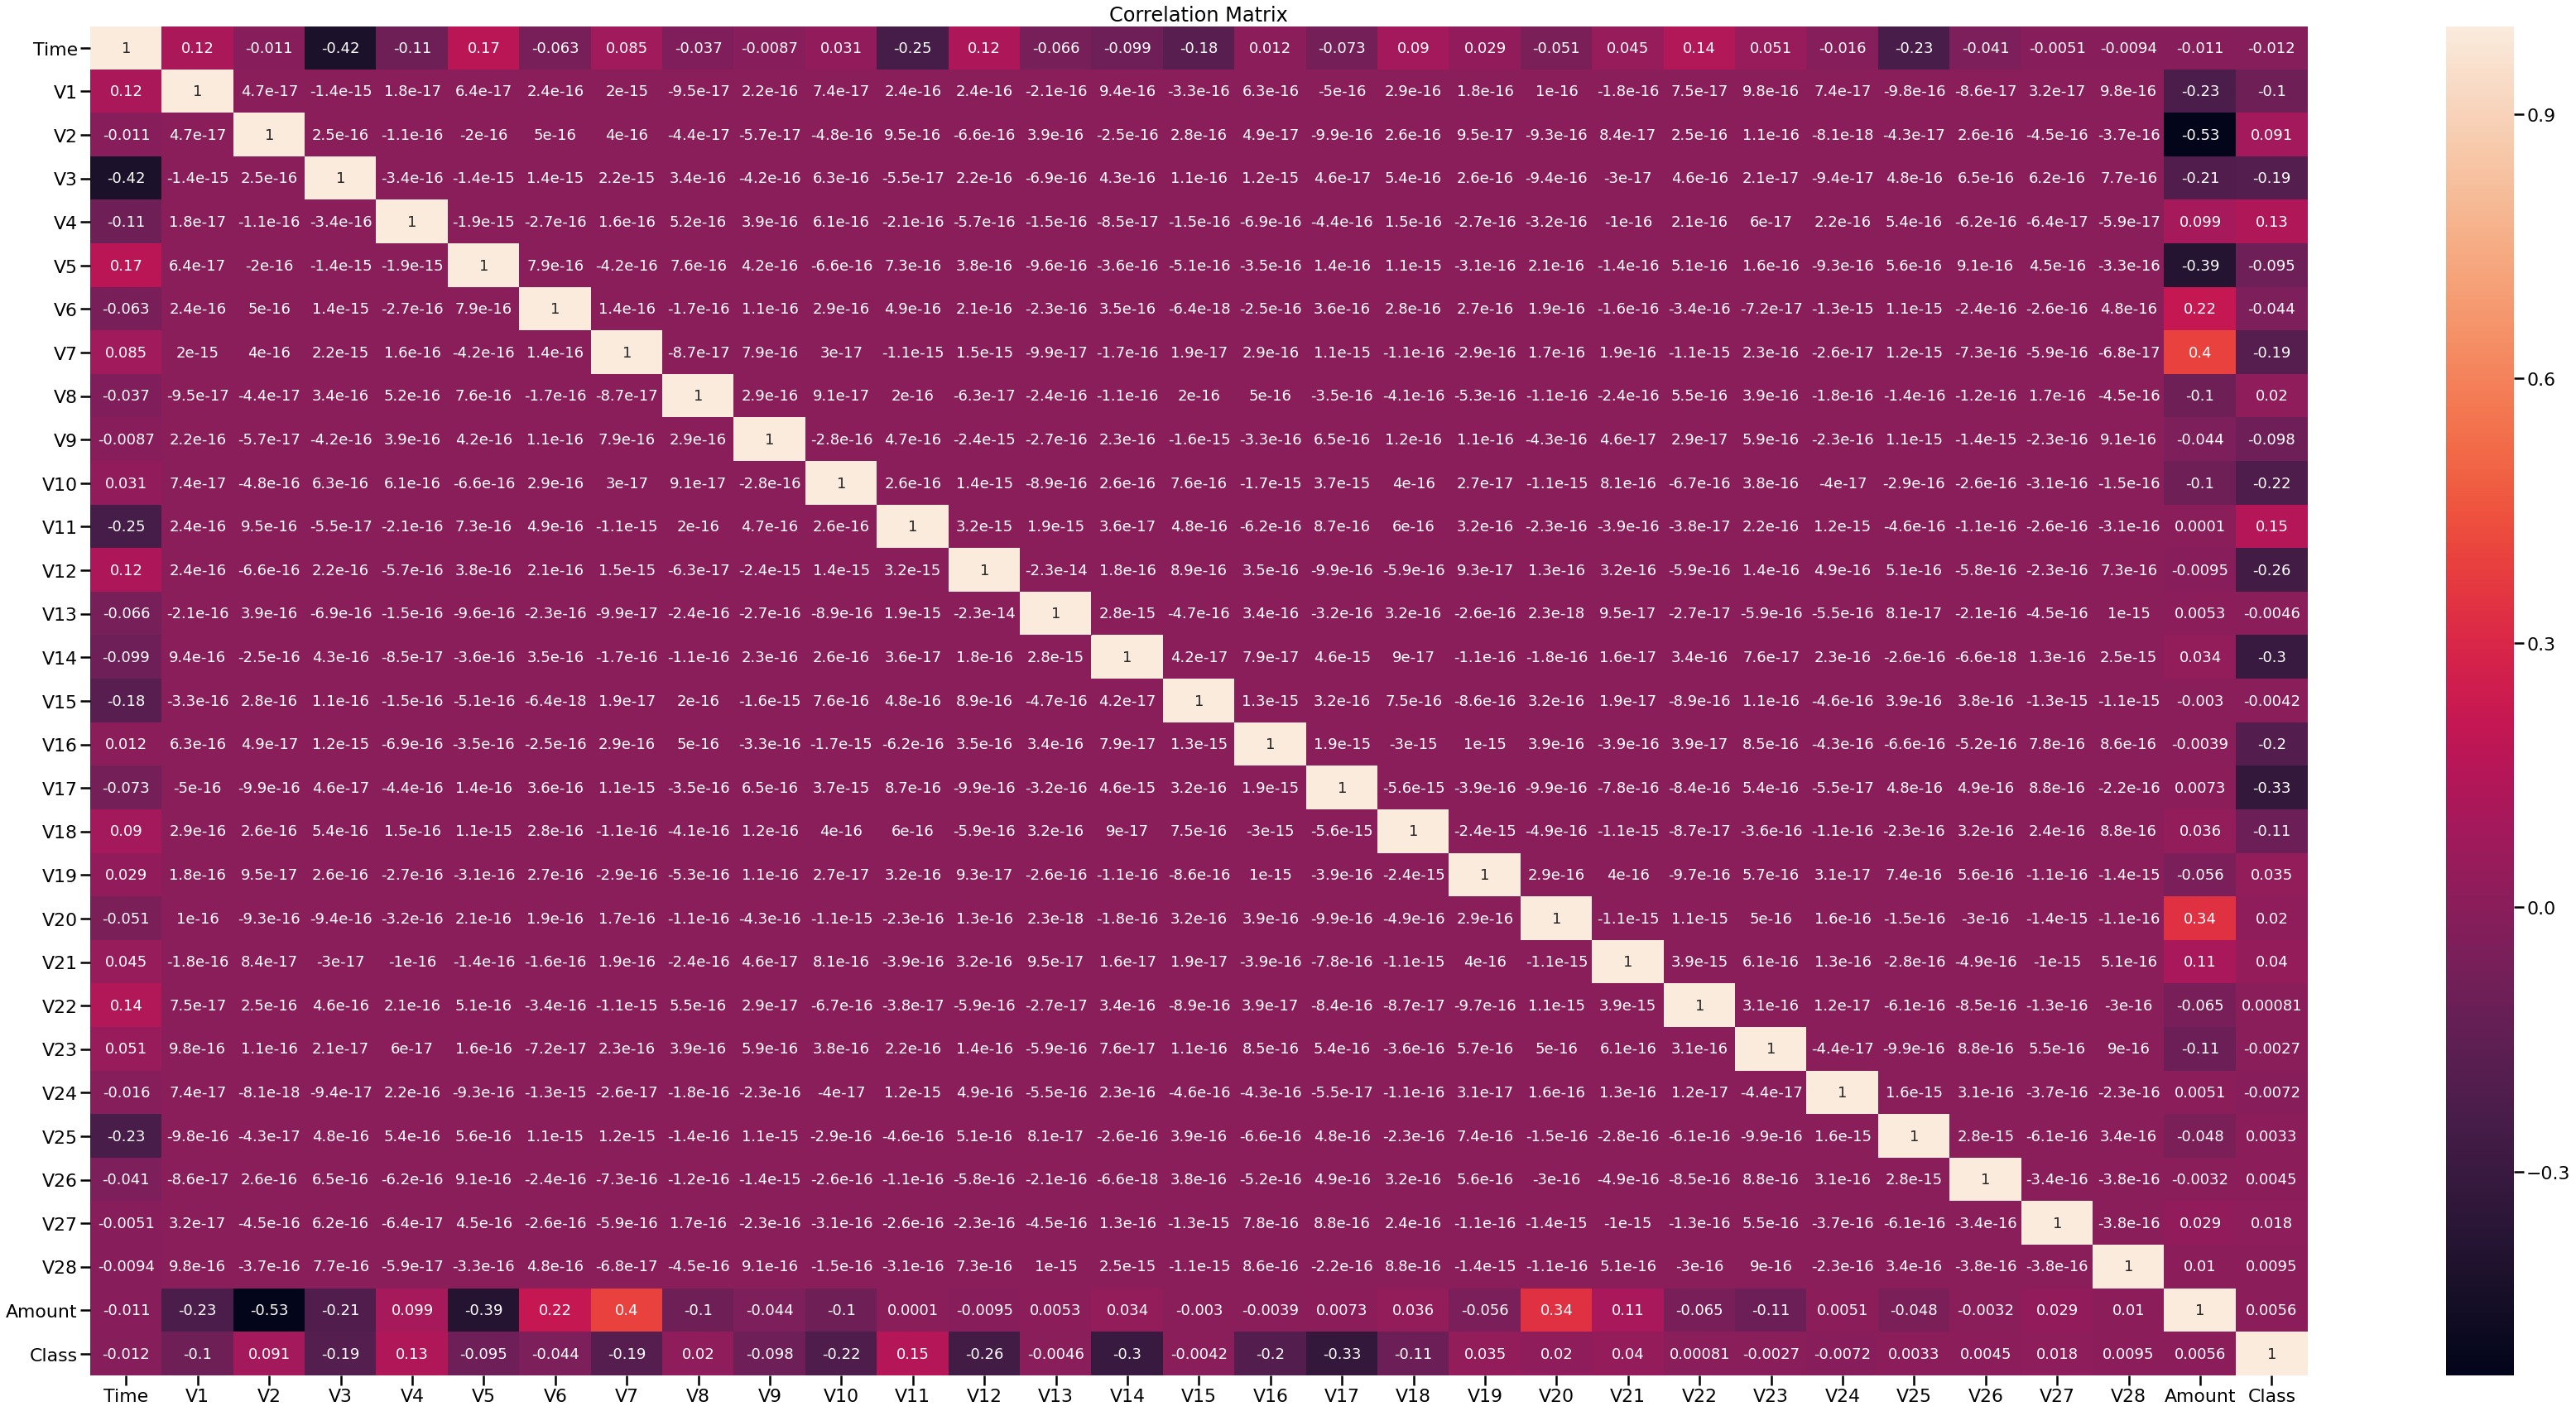

In [14]:
#CORRELATION MATRIX PLOT
sns.set_context('poster',font_scale=1)
plt.figure(figsize=(60, 30))
sns.heatmap(corr, annot = True, annot_kws={"size": 18})
# specify name of the plot
plt.title('Correlation Matrix')
plt.show()

Conclusion from above graph : High Positive correlation -> Amount and V7 , Amount and V20.   
             High Negative correlation -> Time and V3 , V2 and Amount  


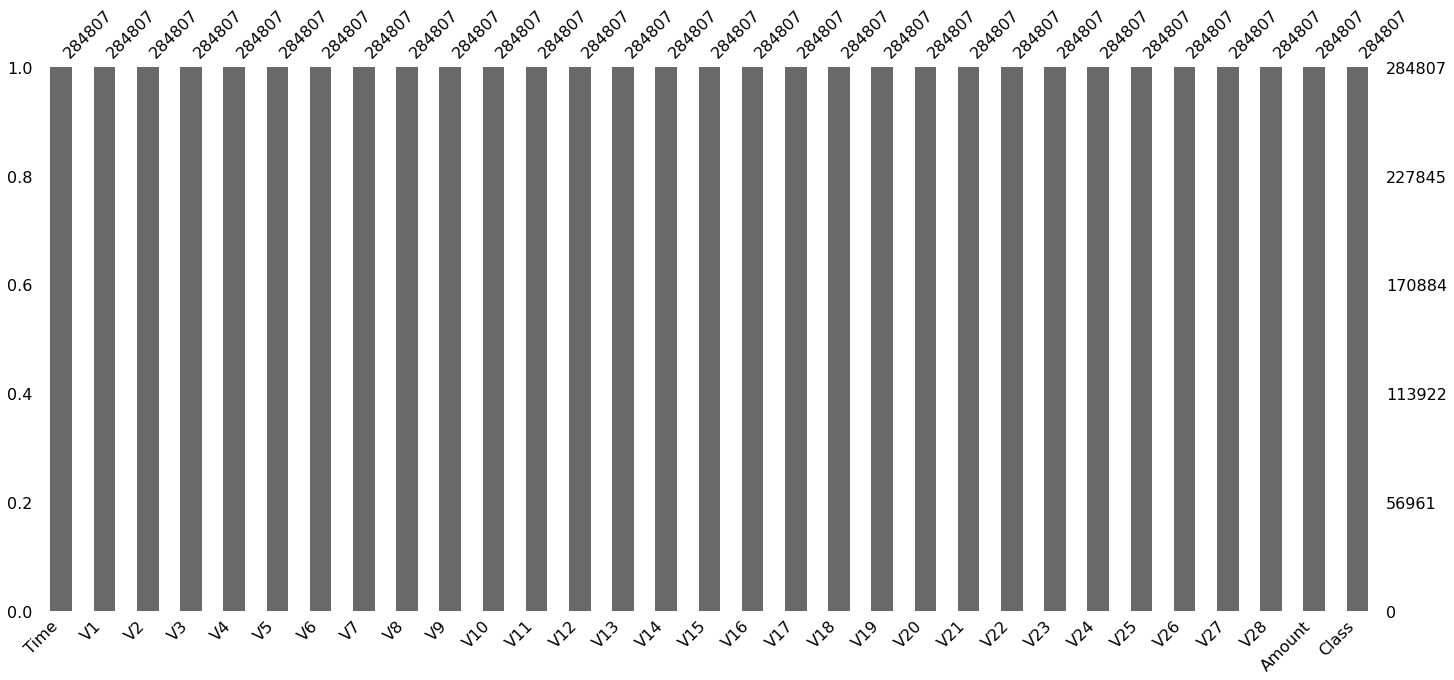

In [15]:
#TO VISUALIZE THE DISTRIBUTION OF NaN VALUES 
import missingno as msn
msn.bar(data)

The above plot shows that , there is no missing values(absence of null values).

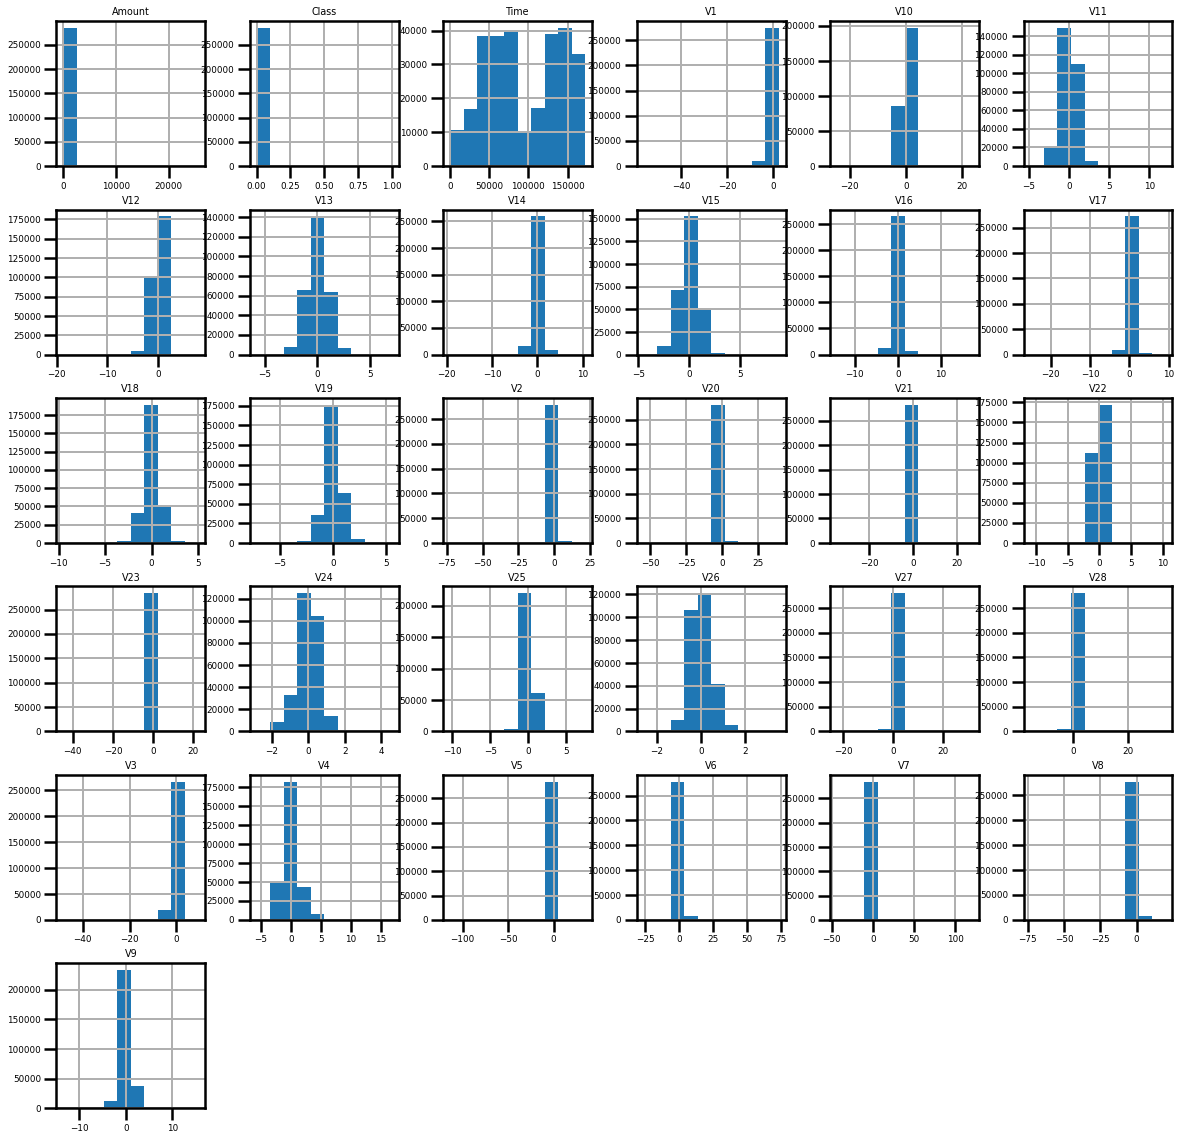

In [17]:
#PLOT OF HISTOGRAM
sns.set_context('poster',font_scale=0.4)
data.hist(figsize = (20,20))
plt.show()

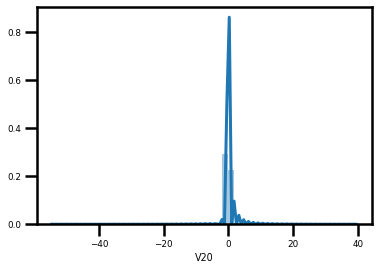

In [18]:
sns.distplot(data['V20'])

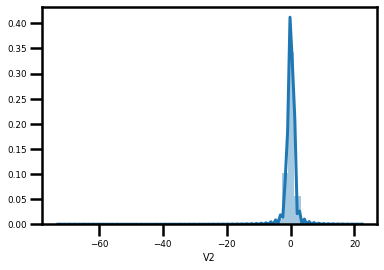

In [19]:
sns.distplot(data['V2'])

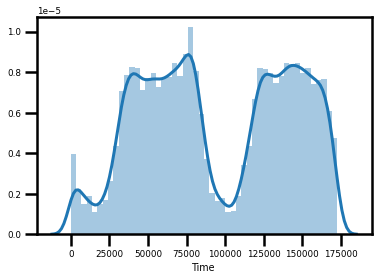

In [20]:
sns.distplot(data["Time"])
plt.show()

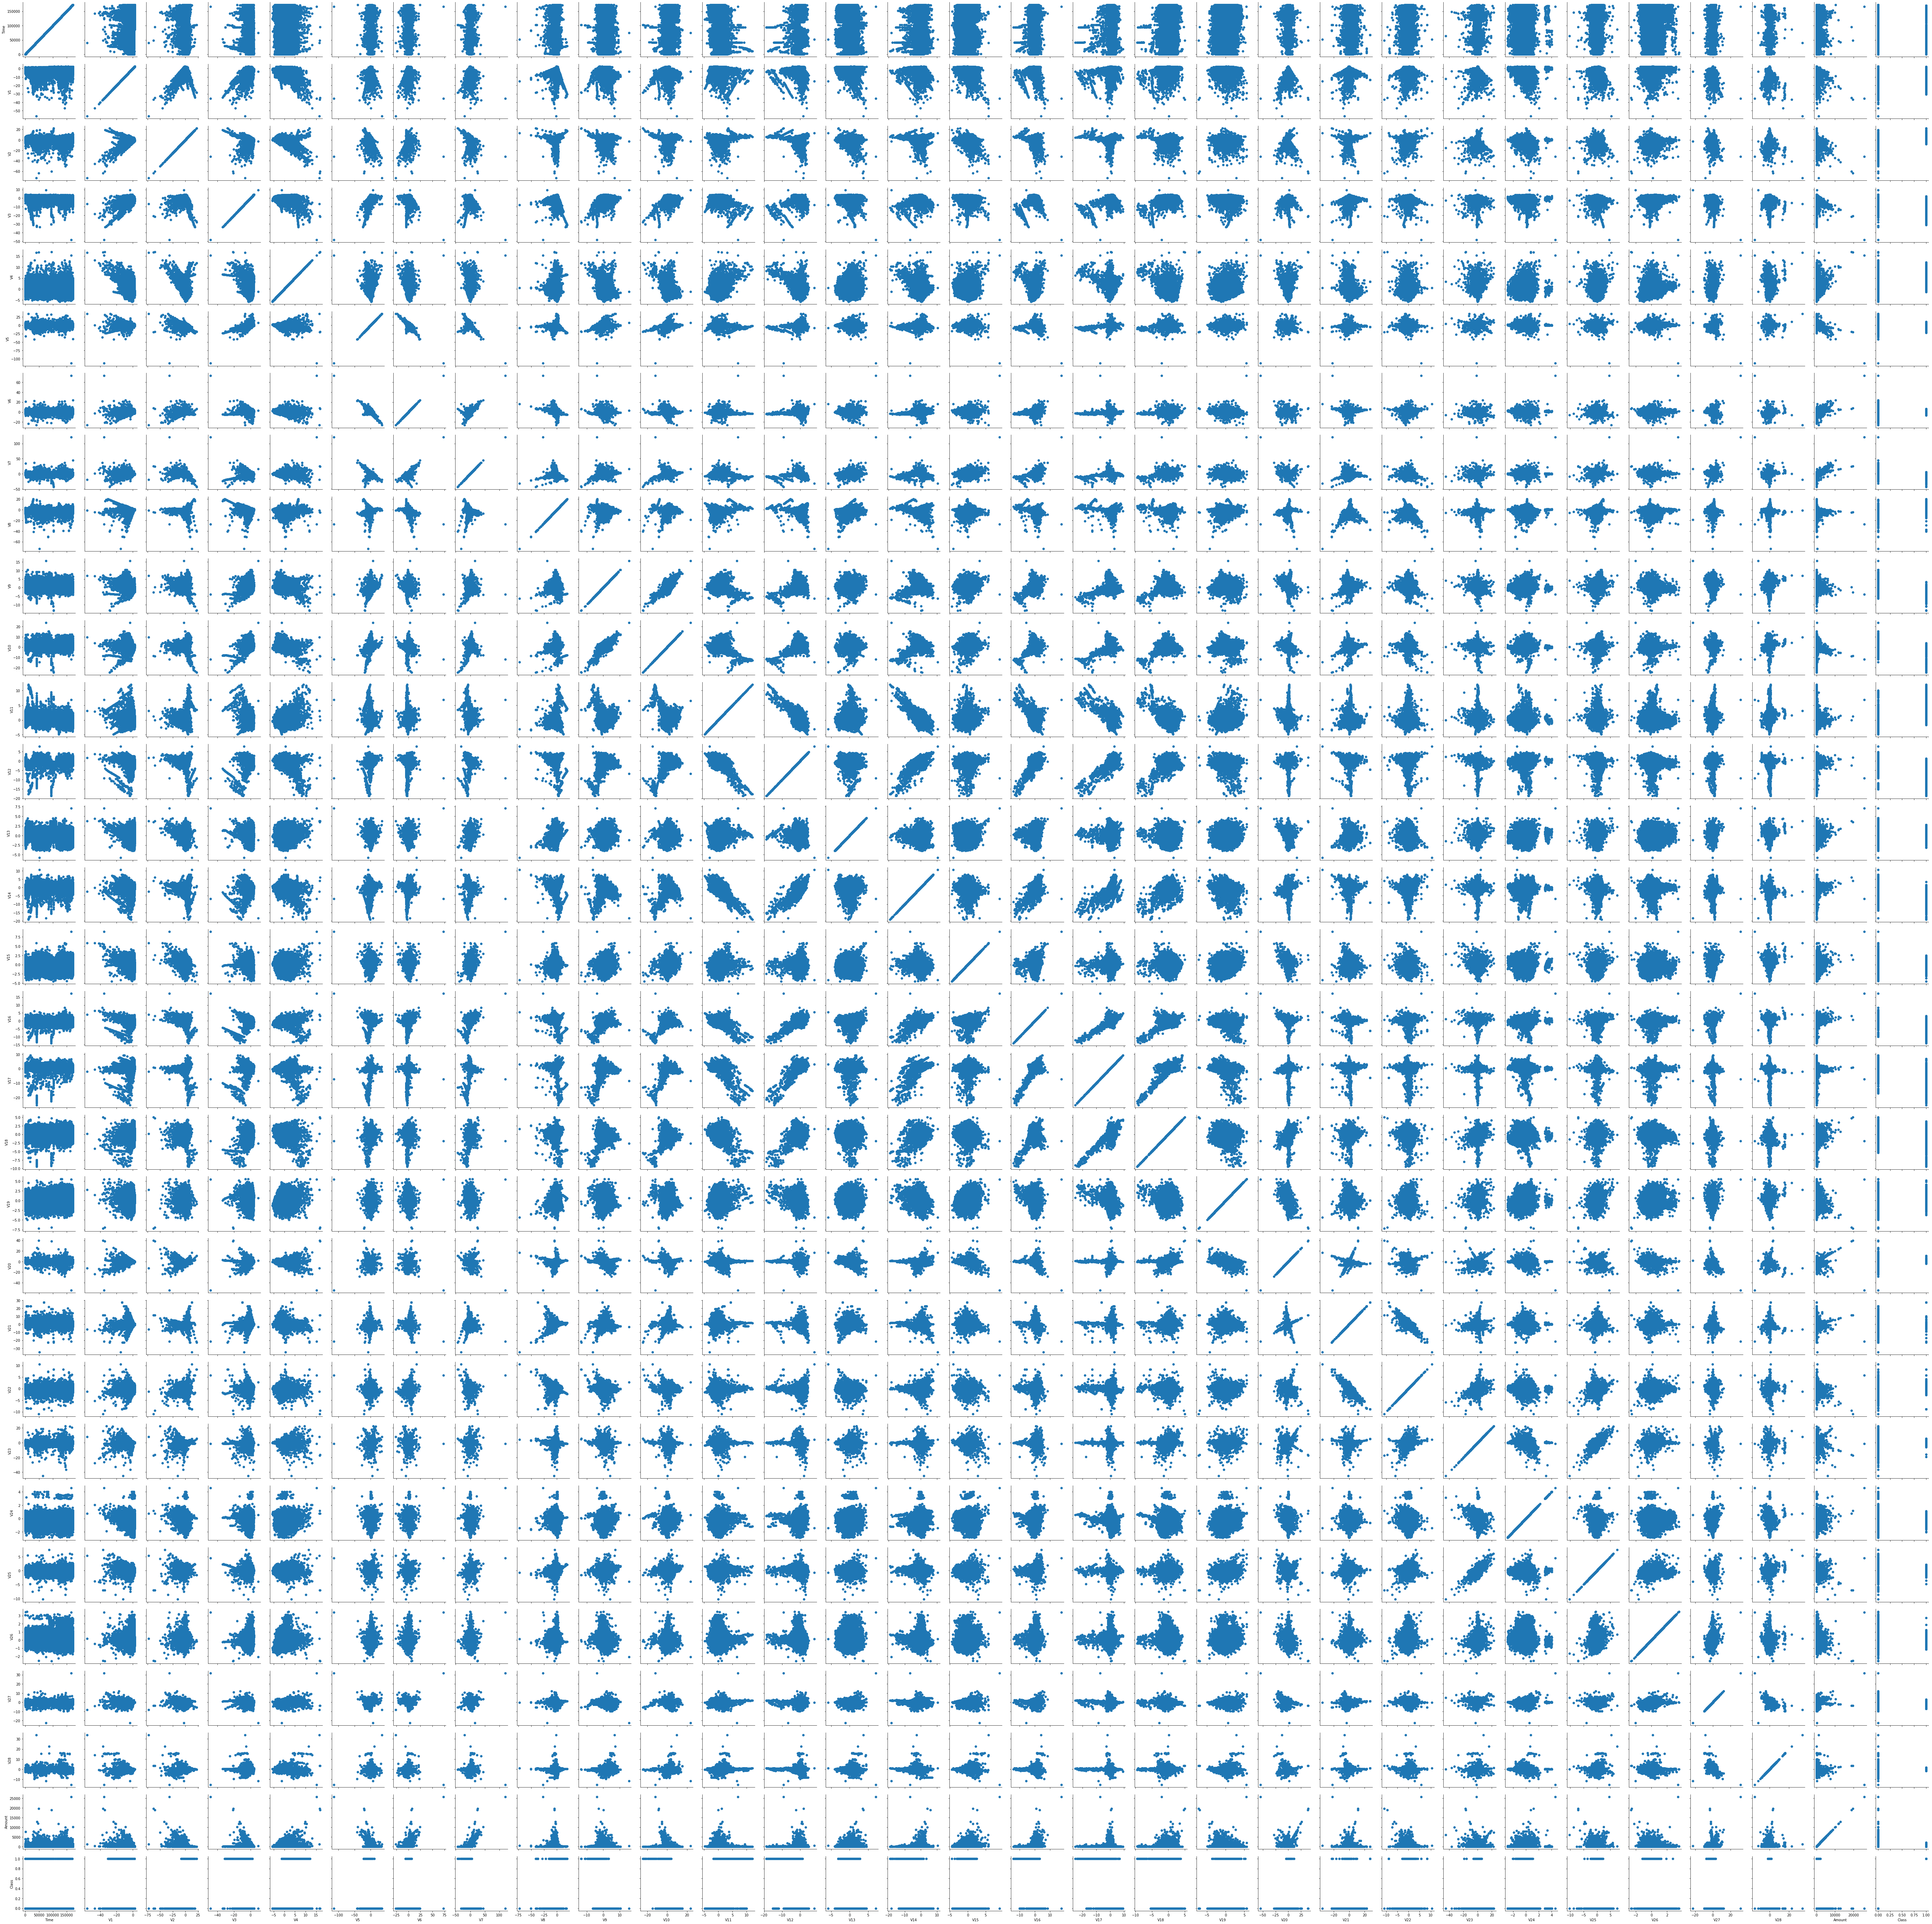

In [3]:
g = sns.PairGrid(data)
g.map(plt.scatter)

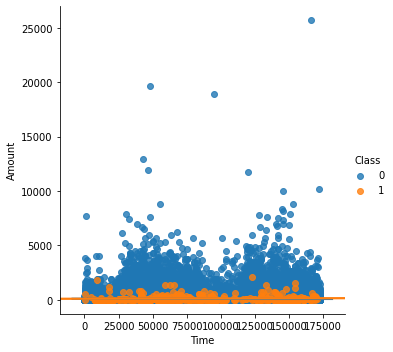

In [16]:
sns.lmplot(x='Time',y='Amount',data=data,hue='Class')

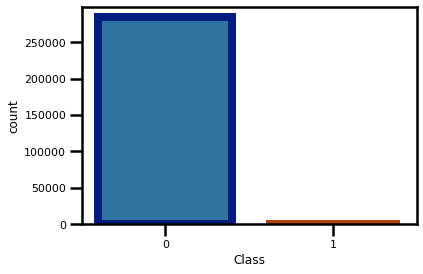

In [17]:
sns.set_context('poster',font_scale=0.5)
sns.countplot(x='Class',data = data, linewidth=8, edgecolor=sns.color_palette("dark", 3))

In [18]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#There is imbalance data in target feature Class of count 1 and 0.
#TO balance the data Smote operation is performed

# SMOTE

Synthetic Minority Oversampling Technique is used to balance the target feature.It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [15]:
#SMOTE
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
ip,op=smt.fit_sample(data,data.Class)

In [16]:
ip.shape

(567612, 31)

In [17]:
ip

Time        V1        V2        V3        V4        V5  \
0            0.000000 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1            0.000000  1.191857  0.266151  0.166480  0.448154  0.060018   
2            1.000000 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3            1.000000 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4            2.000000 -1.158233  0.877737  1.548718  0.403034 -0.407193   
...               ...       ...       ...       ...       ...       ...   
567607  144838.659385 -6.379157  1.672637 -5.885670  2.068340 -0.668576   
567608   65965.011763 -2.479028  0.958932 -1.782249  1.541783 -1.191990   
567609   34592.129093 -1.799894  2.368957 -2.673997  1.705968 -1.355923   
567610  129683.002907  0.255234  2.432041 -5.388252  3.793925 -0.230814   
567611   91471.277869 -4.453646  3.210469 -5.294410  1.449911 -1.264653   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
567607 -3.336450 -4.995823  2.632847 -2.275158  ...  0.641337 -0.249308   
567608 -0.466794 -1.957161  0.312580 -0.433956  ...  0.351983  0.208869   
567609 -1.121788 -2.057832 -1.677459 -0.659287  ...  1.473371 -0.581778   
567610 -1.382725 -1.572929  0.748305 -1.600633  ...  0.316760 -0.036858   
567611 -0.493626 -3.130644 -4.165957  0.998760  ...  4.414468 -1.065864   

             V23       V24       V25       V26       V27       V28  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   
...          ...       ...       ...       ...       ...       ...   
567607 -2.311290 -0.159402  1.190079 -0.258067  0.777265 -0.728919   
567608 -0.235986 -0.404446  0.220454  0.685263 -0.890346  0.598736   
567609 -0.013899 -0.144597  0.120315  0.242272 -0.121166 -0.534238   
567610  0.182968  0.190701 -0.339250 -0.272824  0.315507 -0.091005   
567611  0.798149  0.299668  0.064660 -0.446730 -0.363233  1.018147   

            Amount  Class  
0       149.620000      0  
1         2.690000      0  
2       378.660000      0  
3       123.500000      0  
4        69.990000      0  
...            ...    ...  
567607    7.334751      1  
567608   74.507571      1  
567609  102.486823      1  
567610   58.346854      1  
567611  143.872749      1  

[567612 rows x 31 columns]

In [19]:
op.value_counts()

1    283806
0    283806
Name: Class, dtype: int64

The target feature Class got balanced with equal number of one's and zero's

# DETECTING OUTLIERS

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. Examination of the data for unusual observations that are far removed from the mass of data. These points are often referred to as outliers.

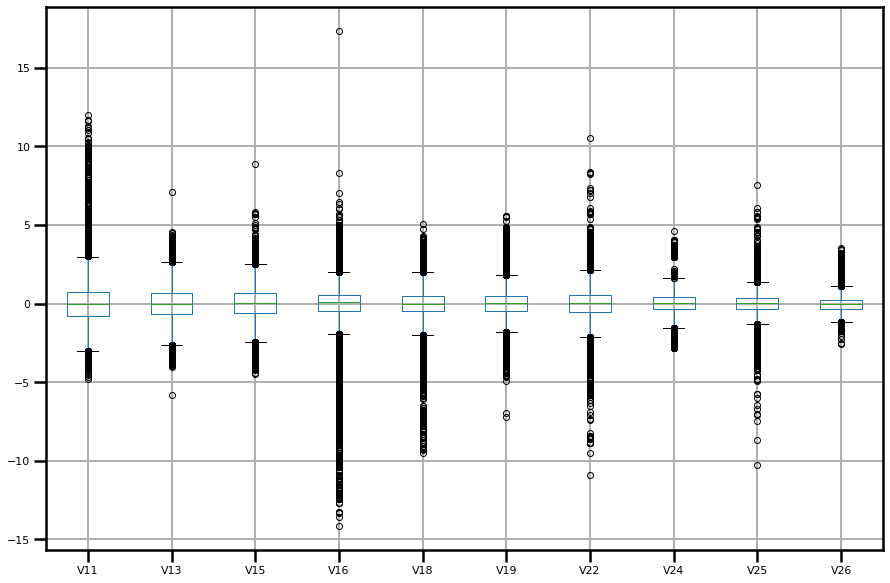

In [20]:
plt.figure(figsize=(15,10))
data.boxplot(['V11','V13','V15', 'V16','V18', 'V19','V22','V24','V25', 'V26'])
plt.show()

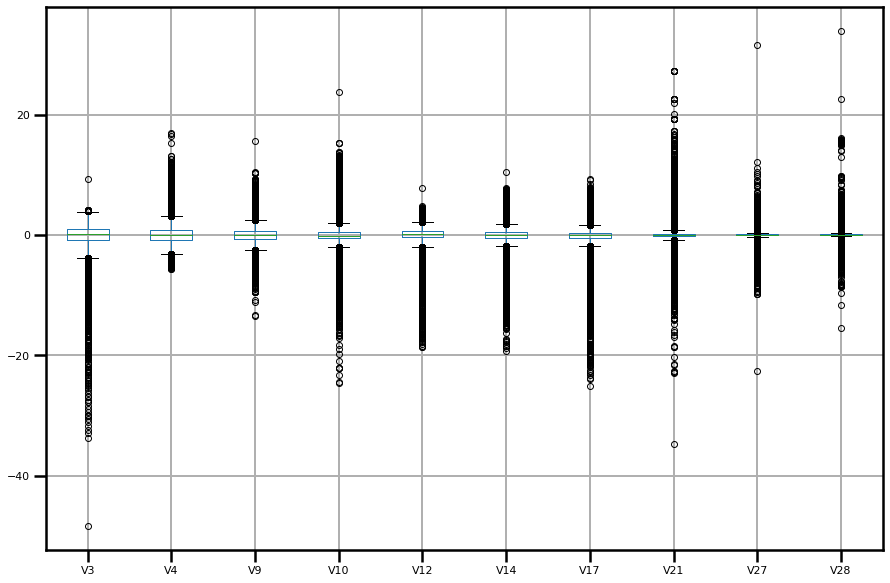

In [21]:
plt.figure(figsize=(15,10))
data.boxplot(['V3','V4', 'V9', 'V10','V12' ,'V14','V17', 'V21','V27','V28'])
plt.show()

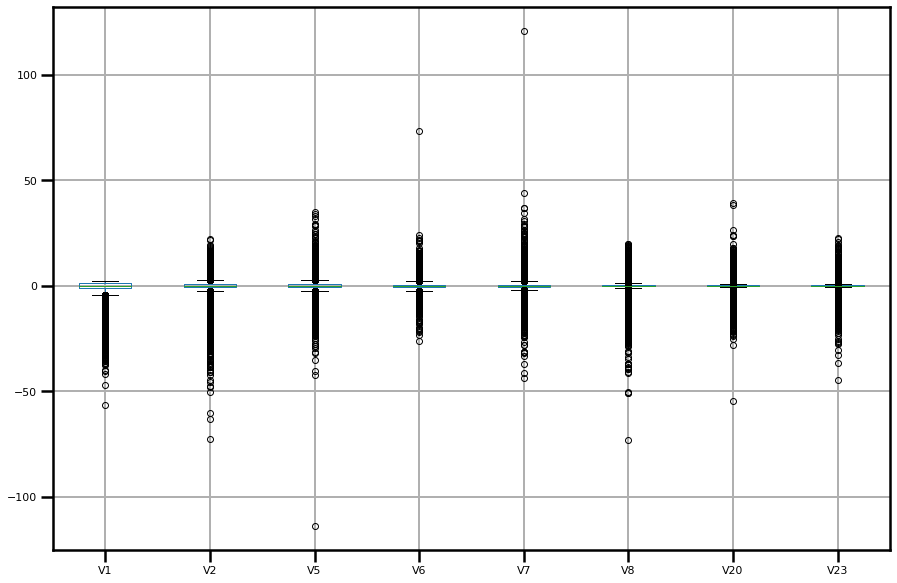

In [22]:
plt.figure(figsize=(15,10))
data.boxplot(['V1','V2','V5','V6','V7','V8','V20','V23'])
plt.show()

# REMOVAL OF OUTLIERS (Z SCORE METHOD)

 Z Score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean.If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

In [23]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(ip))
print(z)

[[1.82484348 0.20510869 0.54799795 ... 0.14978826 0.24589204 1.        ]
 [1.82484348 0.67329577 0.45474418 ... 0.06421488 0.42076476 1.        ]
 [1.8248227  0.2053753  0.8967056  ... 0.24234956 1.28510167 1.        ]
 ...
 [1.10604809 0.12436017 0.12382229 ... 1.377244   0.03203746 1.        ]
 [0.86986041 0.50144142 0.14117928 ... 0.31710317 0.16823621 1.        ]
 [0.07585286 0.36255823 0.35535612 ... 2.33581126 0.21981537 1.        ]]


In [24]:
z.shape

(567612, 31)

In [25]:
threshold = 3
print(np.where(z > 3))

(array([    51,     51,     69, ..., 567602, 567602, 567604], dtype=int64), array([ 6, 29, 26, ..., 17, 18, 27], dtype=int64))


In [29]:
data = ip[(z < 3).all(axis=1)]

In [30]:
data.shape

(482862, 31)

In [31]:
data['Class'].value_counts()

0    266802
1    216060
Name: Class, dtype: int64

# DATA PREDICTION PART

Since the target feature 'Class' consists of only 0 and 1. It comes under a type Classification. So Classification algorithms are applied to build the model.

In [32]:
x = data.drop('Class',axis =1)

In [33]:
y = data['Class']

In [34]:
#SPLITING THE DATASET INTO TRAIN AND TEST

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=62)

# STANDARDIZATION (SCALING)

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

In [36]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(x_train)
x_train = std.transform(x_train)
x_test = std.transform(x_test)

# K NEAREST NEIGHBOUR

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
y_pred = knn.predict(x_test)

In [39]:
df1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

Actual  Predicted
253781       0          0
463535       1          1
413590       1          1
18348        0          0
308301       1          1
...        ...        ...
292021       1          1
215246       0          0
489958       1          1
76176        0          0
7203         0          0

[96573 rows x 2 columns]

CONFUSION MATRIX : A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[53503,    93],
       [    0, 42977]], dtype=int64)

In [41]:
#CALCULATING ACCURACY , F1 , PRECISION AND RECALL SCORE
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("accuracy score ",accuracy_score(y_pred,y_test))
print("f1 score ",f1_score(y_pred,y_test))
print("precision score ",precision_score(y_pred,y_test))
print("recall score ",recall_score(y_pred,y_test))

accuracy score  0.999036997918673
f1 score  0.9989191953234859
precision score  1.0
recall score  0.997840724402136


# DECISION TREE CLASSIFIER

Decision tree analysis involves making a tree-shaped diagram to chart out a course of action or a statistical probability analysis. It is used to break down complex problems or branches. Each branch of the decision tree could be a possible outcome.

In [42]:
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier(random_state = 0)  
regressor.fit(x_train,y_train) 

DecisionTreeClassifier(random_state=0)

In [43]:
y_pred=regressor.predict(x_test)

In [44]:
df2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

Actual  Predicted
253781       0          0
463535       1          1
413590       1          1
18348        0          0
308301       1          1
...        ...        ...
292021       1          1
215246       0          0
489958       1          1
76176        0          0
7203         0          0

[96573 rows x 2 columns]

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[53488,   108],
       [   42, 42935]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("accuracy score ",accuracy_score(y_pred,y_test))
print("f1 score ",f1_score(y_pred,y_test))
print("precision score ",precision_score(y_pred,y_test))
print("recall score ",recall_score(y_pred,y_test))

accuracy score  0.9984467708365692
f1 score  0.9982562194838409
precision score  0.9990227330897922
recall score  0.9974908812118114


# LOGISTIC REGRESSION

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [48]:
y_pred = lr.predict(x_test)

In [49]:
df3 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df3

Actual  Predicted
253781       0          0
463535       1          1
413590       1          1
18348        0          0
308301       1          1
...        ...        ...
292021       1          1
215246       0          0
489958       1          1
76176        0          0
7203         0          0

[96573 rows x 2 columns]

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("accuracy score ",accuracy_score(y_pred,y_test))
print("f1 score ",f1_score(y_pred,y_test))
print("precision score ",precision_score(y_pred,y_test))
print("recall score ",recall_score(y_pred,y_test))

accuracy score  0.9806260549014735
f1 score  0.9779838320605297
precision score  0.9669358028713032
recall score  0.9892872446793315


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[53146,   450],
       [ 1421, 41556]], dtype=int64)

# RANDOM FOREST CLASSIFIER

Random forests or random decision forests are an ensemble learning method.Random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting.

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
y_pred = rf.predict(x_test)

In [54]:
df4 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df4

Actual  Predicted
253781       0          0
463535       1          1
413590       1          1
18348        0          0
308301       1          1
...        ...        ...
292021       1          1
215246       0          0
489958       1          1
76176        0          0
7203         0          0

[96573 rows x 2 columns]

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[53581,    15],
       [    1, 42976]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("accuracy score ",accuracy_score(y_pred,y_test))
print("f1 score ",f1_score(y_pred,y_test))
print("precision score ",precision_score(y_pred,y_test))
print("recall score ",recall_score(y_pred,y_test))

accuracy score  0.9998343222225674
f1 score  0.9998138842359948
precision score  0.9999767317402332
recall score  0.9996510897629737


# CONCLUSION

Since the target feature is of type Classification , So to predict the output of the test data classification algorithms applied. Among K Nearest Neighbour , Decision tree , Logistic Regression and Random Forest .Model built on Random Forest classifier predicted the output of the test data with high accuracy. The results of Random forest model, accuracy score is 0.9998343222225674, f1 score  0.9998138842359948 , precision score  0.9999767317402332, recall score  0.9996510897629737.Therefore Random Forest Classifier best suits to given dataset.